# Download data

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist_data = fetch_openml('mnist_784', version=1, cache=True)
X, y = mnist_data["data"], mnist_data["target"]
y = y.astype(np.int8)

# SPLIT

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


# Label 8 as true

In [3]:
index = 2

for label in range(len(y_train)):
    
    if y_train[label] == 8:
        print(label)
        break
        
    

y_train = (y_train == 8)
y_test = (y_test == 8)


2


# pre-pro

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



In [5]:
pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = pipeline.fit_transform(x_train)
X_test_tr = pipeline.transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')

# Train

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_clf, X_train_tr, y_train, cv=3, scoring="accuracy")

array([0.95698291, 0.95784004, 0.95606986])

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(lr_clf, X_train_tr, y_train, cv=3)


In [9]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

precision = precision_score(y_train, y_train_pred)
print(precision)

recall = recall_score(y_train, y_train_pred)
print(recall)


[[49737   795]
 [ 1615  3853]]
0.8289586919104991
0.7046452084857352


In [10]:

Y_scores = cross_val_predict(lr_clf, X_train_tr, y_train, cv=3, method="predict_proba")

In [11]:
print(Y_scores)

[[9.89800166e-01 1.01998339e-02]
 [9.68906980e-01 3.10930197e-02]
 [8.15780047e-01 1.84219953e-01]
 ...
 [9.79115728e-01 2.08842719e-02]
 [9.99731178e-01 2.68822487e-04]
 [9.99172205e-01 8.27795042e-04]]


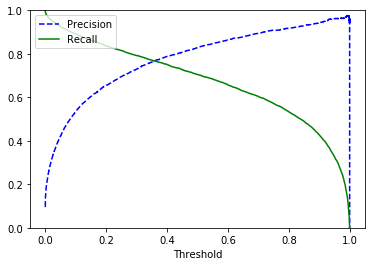

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recalls, thresholds = precision_recall_curve(y_train, Y_scores[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precision, recalls, thresholds)

In [14]:
t = 0.75
y_prec_scores = Y_scores[:, 1] > t

precision = precision_score(y_train, y_prec_scores)
print(precision)

recall = recall_score(y_train, y_prec_scores)
print(recall)

0.9087739686228936
0.5720555961960497


In [15]:
from sklearn.linear_model import LogisticRegression
lr_clf_new = LogisticRegression(solver='liblinear')
lr_clf_new.fit(X_train_tr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_test_proba = lr_clf_new.predict_proba(X_test_tr)
y_test_proba = y_test_proba[:,1] > t
print(y_test_proba)

[ True False False ... False False False]


In [17]:
precision = precision_score(y_test, y_test_proba)
print(precision)

recall = recall_score(y_test, y_test_proba)
print(recall)

0.9118329466357309
0.5792188651436994
